#### Mobile Dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
mobile_df = pd.read_csv('mobile_dataset.csv')
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### 1.Univariate Selection

In [5]:
x = mobile_df.iloc[:,:-1]
y = mobile_df.iloc[:,-1]

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_rank_features.fit(x,y)
ordered_feature.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [8]:
df_scores =pd.DataFrame(ordered_feature.scores_, columns=['Score'])
df_columns = pd.DataFrame(x.columns, columns=['Features'])
features_rank = pd.concat([df_columns,df_scores],axis=1)
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [9]:
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


#### 2. Feature Importance

In [10]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [11]:
print(model.feature_importances_)

[0.06086737 0.02037754 0.03288732 0.02091396 0.03281306 0.01792069
 0.03539001 0.03256152 0.03656523 0.03381376 0.03452776 0.04721343
 0.0483622  0.3908901  0.03363385 0.03370392 0.03541757 0.01430244
 0.01798035 0.01985794]


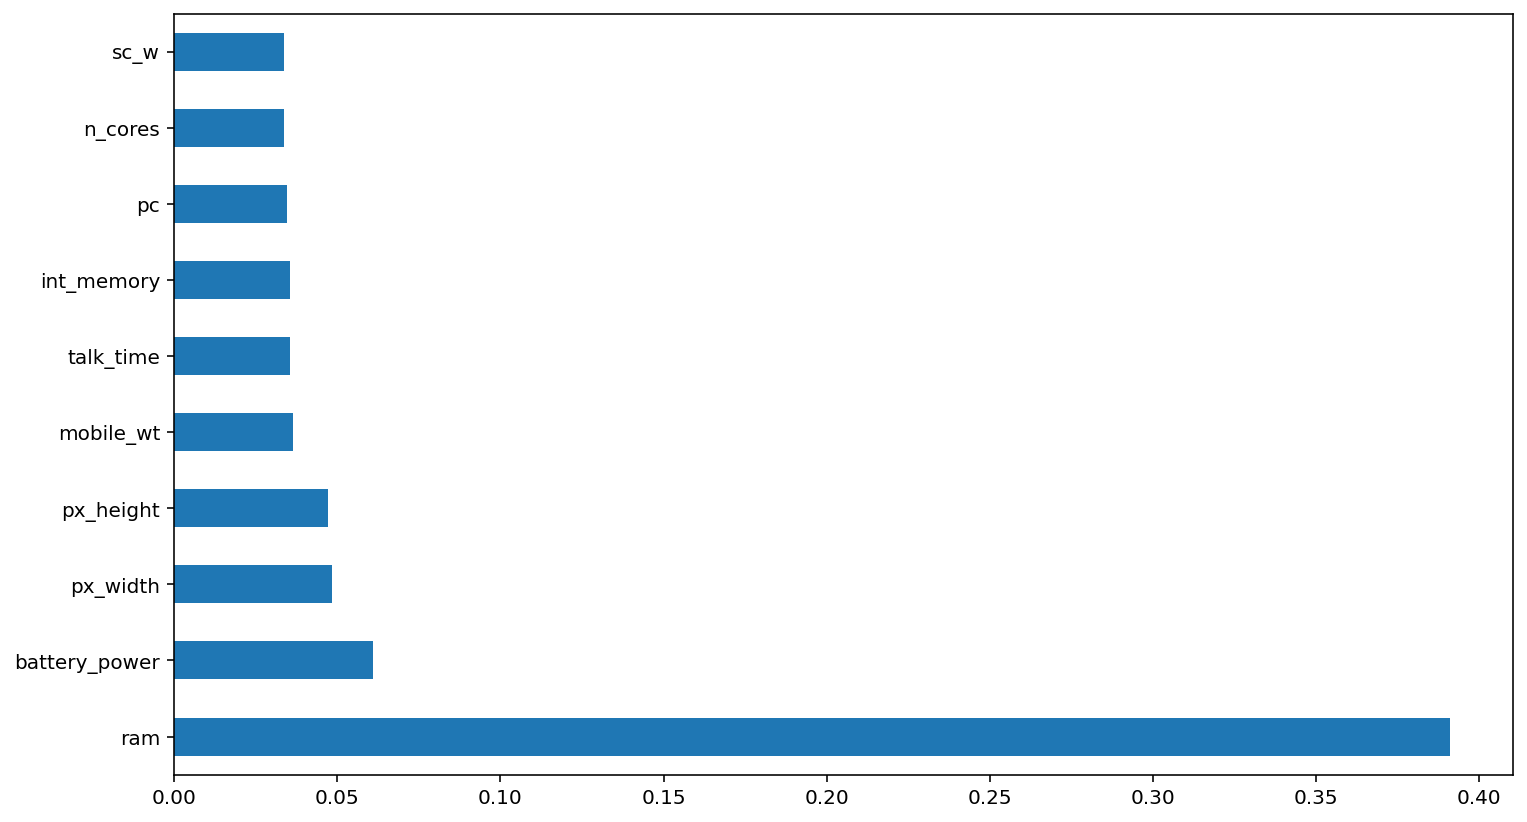

In [12]:
ranked_featuresETC = pd.Series(model.feature_importances_, index=x.columns)
ranked_featuresETC.nlargest(10).plot(kind='barh')
plt.show()

#### Correlation

<AxesSubplot:>

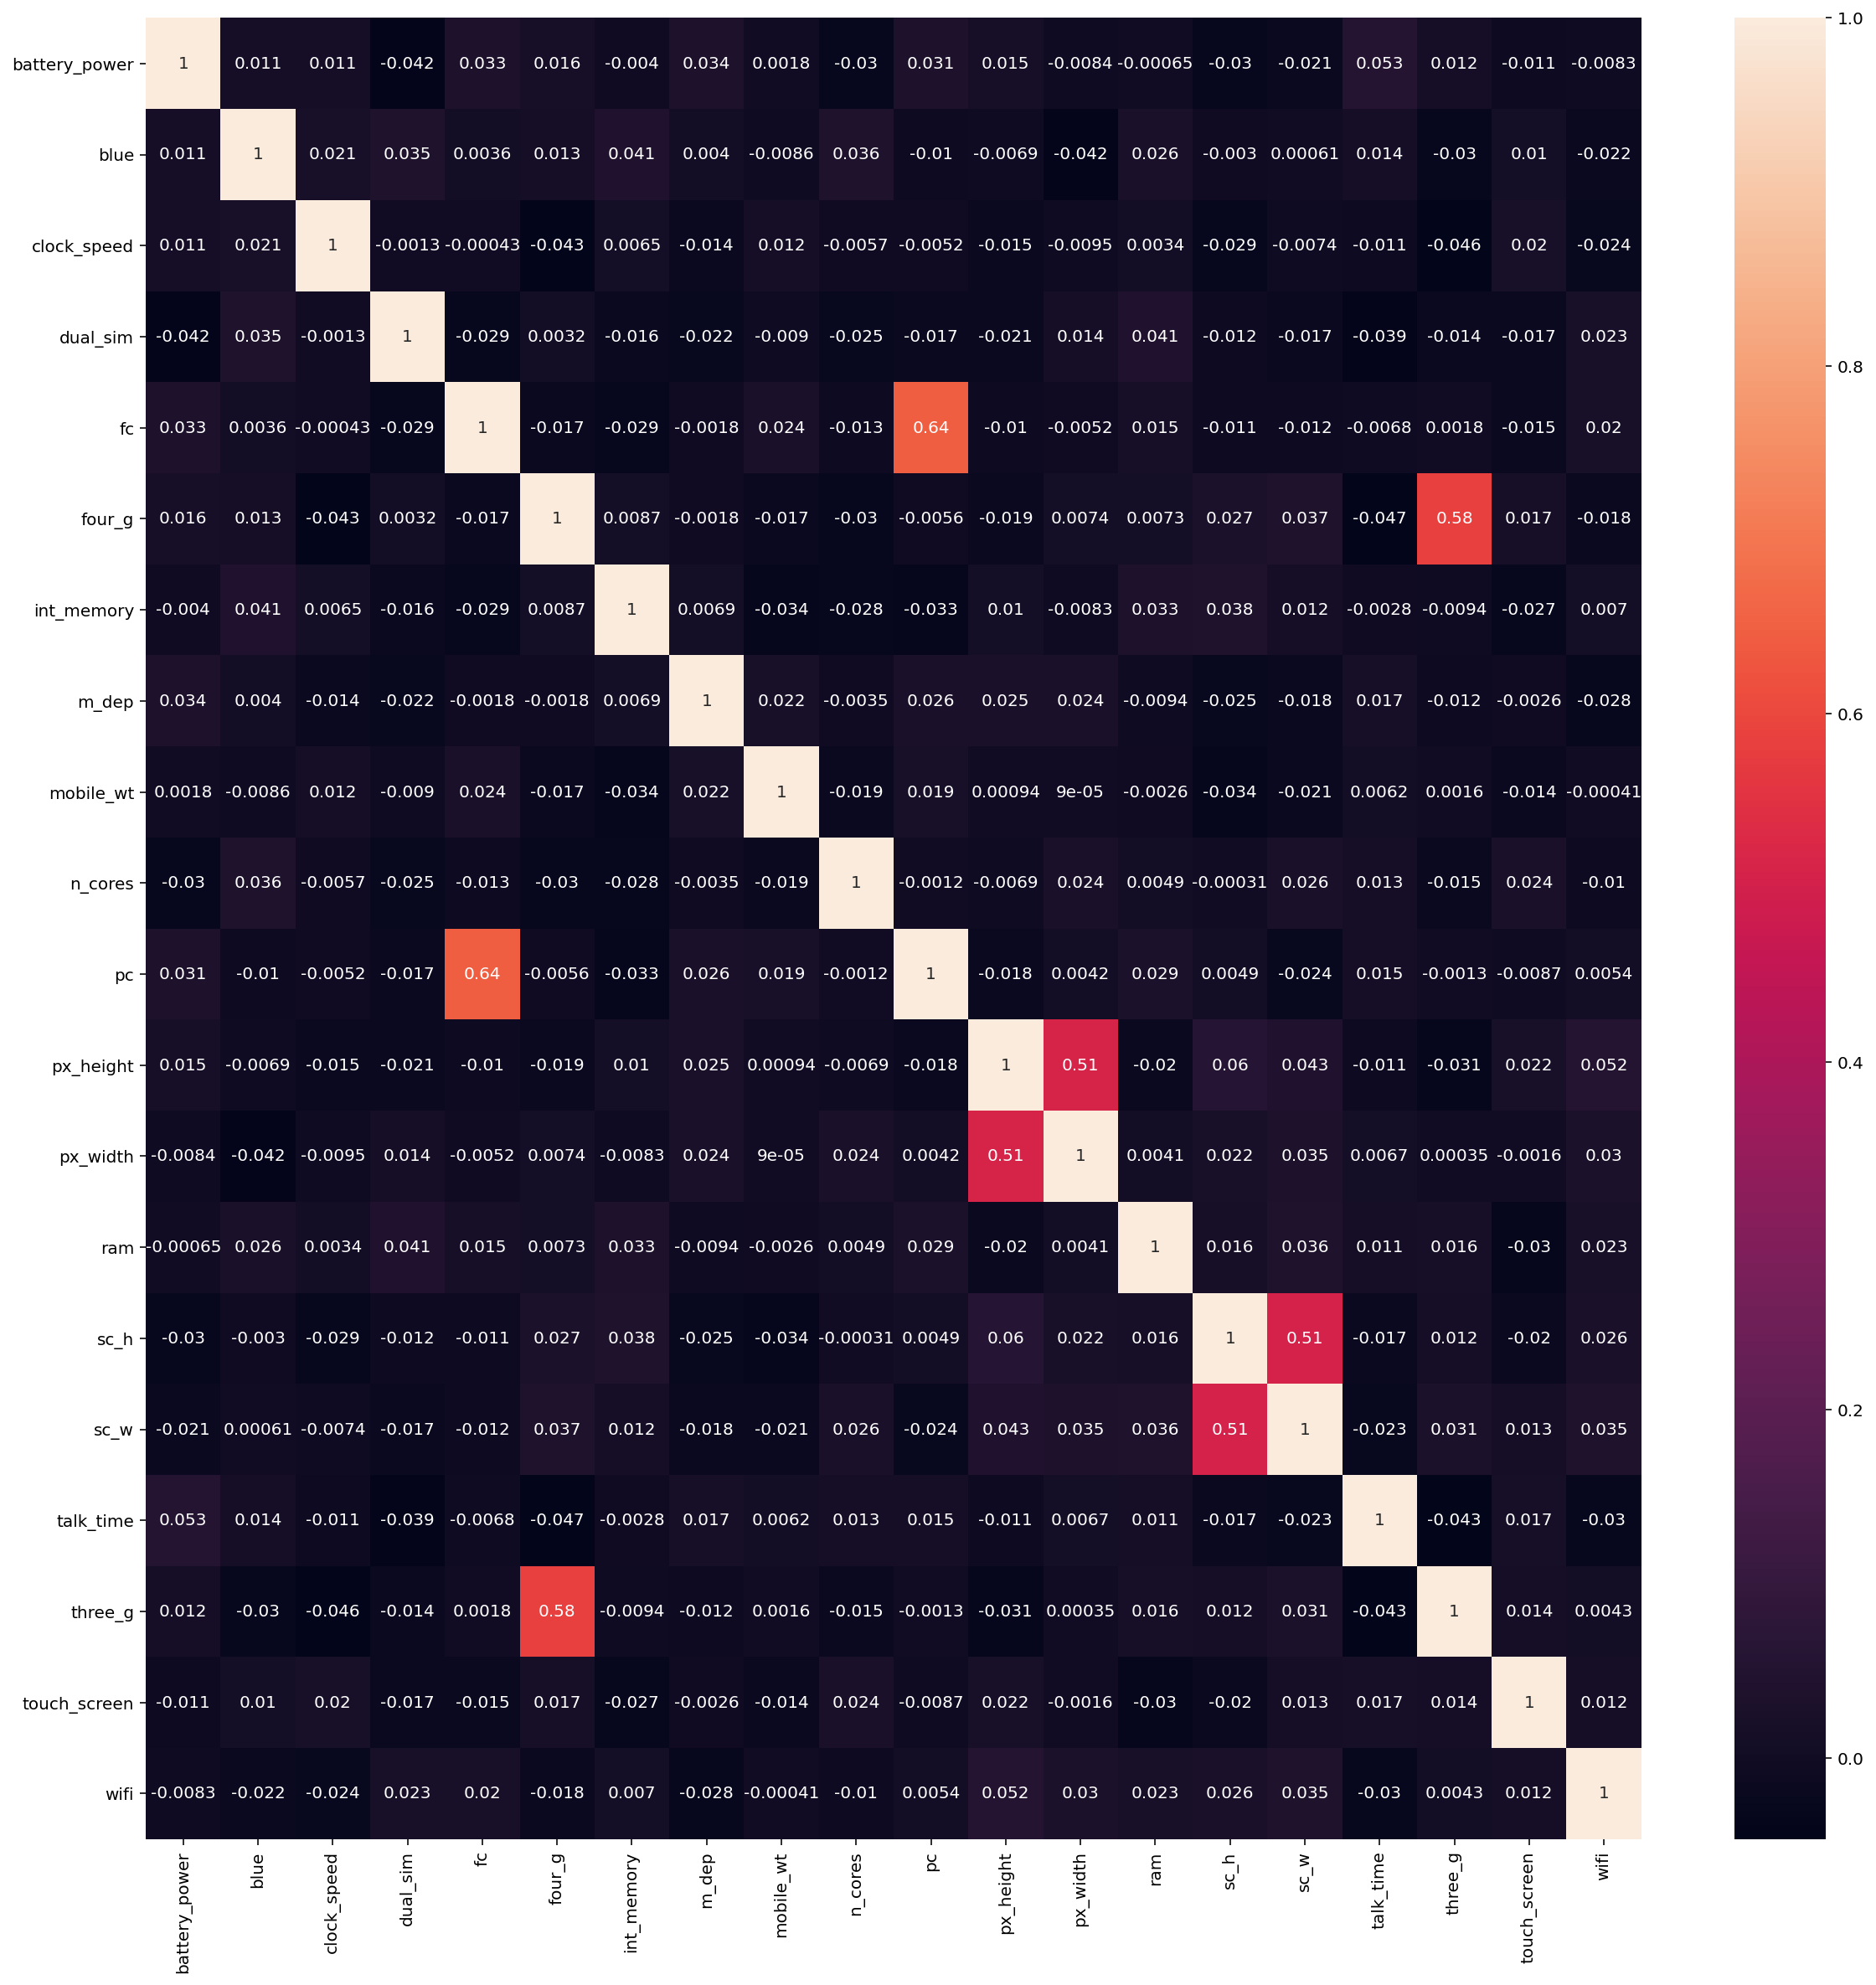

In [14]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(mobile_df.iloc[:,:-1].corr(),annot=True)

In [19]:
threshold = 0.5
def corr_function(df,threshold):
    corr_features = set()
    corr = mobile_df.iloc[:,:-1].corr()
    for i in range (len(corr.columns)):
        for j in range(i):
            if(corr.iloc[i,j]> threshold):
                corr_features.add(corr.columns[i])
    return corr_features

In [20]:
corr_featurs = corr_function(mobile_df,threshold)
corr_featurs

{'pc', 'px_width', 'sc_w', 'three_g'}

#### Information Gain

In [23]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x,y)

In [25]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending=False)

ram              0.850643
touch_screen     0.029486
px_height        0.029412
px_width         0.028421
blue             0.025433
battery_power    0.024337
four_g           0.018622
sc_w             0.015420
talk_time        0.011367
pc               0.007516
wifi             0.007037
m_dep            0.005290
mobile_wt        0.004213
n_cores          0.002921
dual_sim         0.000504
int_memory       0.000000
sc_h             0.000000
fc               0.000000
three_g          0.000000
clock_speed      0.000000
dtype: float64